# Capstone - Travel Recommender (WanderLust)

## Notebook 2 of 4
- Notebook 1: Introduction, Scraping
- **Notebook 2: Combining Datasets, Data Cleaning, EDA and Base Model**
- Notebook 3: NLP (Sentiment Analysis), Feature Engineering + EDA + Model(With Feature Engineering) Conclusion + Recommendations
- Notebook 4: Google Cloud + Streamlit

### Datasets
- The datasets were obtained from [here](https://github.com/sachinnpraburaj/Intelligent-Travel-Recommendation-System)
- Additional information that were not available in the dataset were scrapped from Tripadvisor website using Selenium
- As per the dataset, the focus will be on Canada Tripadvisor

- List of datasets that were imported for this project 
1. `attractions_details_batch1.csv`
2. `attractions_details_batch1.csv`
3. `attractions_cat.csv`
4. `attractions_reviews_batch1_1.csv`
5. `attractions_reviews_batch1_2.csv`
6. `attractions_reviews_batch1_3.csv`
7. `attractions_reviews_batch1_4.csv`
8. `attractions_reviews_batch1_5.csv`
9. `attractions_reviews_batch1_6.csv`
10. `attractions_reviews_batch1_7.csv`
11. `attractions_reviews_batch2_1.csv`
12. `attractions_reviews_batch2_2.csv`
13. `attractions_reviews_batch2_3.csv`
14. `attractions_reviews_batch2_4.csv`
15. `attractions_reviews_batch2_5.csv`
16. `attractions_reviews_batch2_6.csv`

| Dataset | Description |
|---|---|
| attractions_details.csv | attraction_id, name, country, province, city, location, location__lat, location__lng, price and rating|
| attractions_cat.csv | attraction_id, attraction, category|
| attractions_review.csv | attraction_id, rating, review, review_date, user|

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.metrics.pairwise import cosine_similarity

## Import Data and Merging all the csv files 
- `attractions`, `reviews`, `categories` + Data Cleaning

### Merging 'attractions' files
- The attraction datasets has 2 batch files, thus combining to 1 file.

In [2]:
attractions1 = pd.read_csv('./datasets/attractions_details_batch1.csv')

In [3]:
attractions2 = pd.read_csv('./datasets/attractions_details_batch2.csv')

In [4]:
attractions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   attraction_id  1986 non-null   int64  
 1   name           1986 non-null   object 
 2   country        1986 non-null   object 
 3   province       1986 non-null   object 
 4   city           1986 non-null   object 
 5   location       688 non-null    object 
 6   location__lat  1298 non-null   float64
 7   location__lng  1298 non-null   float64
 8   price          1986 non-null   float64
 9   rating         1986 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 155.3+ KB


In [5]:
attractions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   attraction_id  1651 non-null   int64  
 1   name           1651 non-null   object 
 2   country        1651 non-null   object 
 3   province       1651 non-null   object 
 4   city           1651 non-null   object 
 5   location__lat  1096 non-null   float64
 6   location__lng  1096 non-null   float64
 7   location       555 non-null    object 
 8   price          1651 non-null   float64
 9   rating         1651 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 129.1+ KB


In [6]:
# Combining both attraction csv files 
attractions = pd.concat([attractions1,attractions2],ignore_index=True)

In [7]:
attractions

,attraction_id,name,country,province,city,location,location__lat,location__lng,price,rating
0,0,vancouver_city_sightseeing_tour,canada,british_columbia,vancouver,NaN,49.197832,-123.064996,80.0,4.5
1,1,vancouver_to_victoria_and_butchart_gardens_tou...,canada,british_columbia,vancouver,NaN,49.197832,-123.064996,210.0,5.0
2,2,quebec_city_and_montmorency_falls_day_trip_fro...,canada,quebec,montreal,NaN,45.500146,-73.572026,115.0,4.5
3,3,niagara_falls_day_trip_from_toronto,canada,ontario,toronto,NaN,43.656151,-79.384264,169.0,5.0
4,4,"best_of_niagara_falls_tour_from_niagara_falls,...",canada,ontario,niagara_falls,NaN,43.085714,-79.082431,158.0,5.0
...,...,...,...,...,...,...,...,...,...,...
3632,3653,10-day_new_england_fall_foliage_tour_including...,united_states,new_hampshire_(nh),manchester,NaN,42.847646,-71.537301,-1.0,4.0
3633,3654,7-day_best_of_new_england_tour,united_states,new_hampshire_(nh),manchester,NaN,42.847646,-71.537301,-1.0,5.0
3634,3655,5-night_churchill_tour_and_polar_bear_adventur...,canada,manitoba,churchill,NaN,58.769875,-94.175789,-1.0,5.0
3635,3656,"private_niagara_falls,_niagara-on-the-lake,_ca...",canada,ontario,niagara_falls,nil,NaN,NaN,149.0,5.0


In [8]:
# 'location' column does not contain any useful data, thus the column will be dropped
attractions['location'].value_counts()

nil    1243
Name: location, dtype: int64

In [9]:
attractions.drop(labels='location',axis=1,inplace=True)

In [10]:
attractions

,attraction_id,name,country,province,city,location__lat,location__lng,price,rating
0,0,vancouver_city_sightseeing_tour,canada,british_columbia,vancouver,49.197832,-123.064996,80.0,4.5
1,1,vancouver_to_victoria_and_butchart_gardens_tou...,canada,british_columbia,vancouver,49.197832,-123.064996,210.0,5.0
2,2,quebec_city_and_montmorency_falls_day_trip_fro...,canada,quebec,montreal,45.500146,-73.572026,115.0,4.5
3,3,niagara_falls_day_trip_from_toronto,canada,ontario,toronto,43.656151,-79.384264,169.0,5.0
4,4,"best_of_niagara_falls_tour_from_niagara_falls,...",canada,ontario,niagara_falls,43.085714,-79.082431,158.0,5.0
...,...,...,...,...,...,...,...,...,...
3632,3653,10-day_new_england_fall_foliage_tour_including...,united_states,new_hampshire_(nh),manchester,42.847646,-71.537301,-1.0,4.0
3633,3654,7-day_best_of_new_england_tour,united_states,new_hampshire_(nh),manchester,42.847646,-71.537301,-1.0,5.0
3634,3655,5-night_churchill_tour_and_polar_bear_adventur...,canada,manitoba,churchill,58.769875,-94.175789,-1.0,5.0
3635,3656,"private_niagara_falls,_niagara-on-the-lake,_ca...",canada,ontario,niagara_falls,NaN,NaN,149.0,5.0


In [11]:
# Export as 1 attractions file
attractions.to_csv('./datasets/attractions.csv')

### Import attractions categories file
- The attractions categories csv file includes the attraction URL and the category of the attractions

In [12]:
attractions_cat = pd.read_csv('./datasets/attractions_cat.csv')

In [13]:
# The attraction_id is located in the index of the file
attractions_cat.reset_index(inplace=True)
attractions_cat = attractions_cat.rename(columns = {'index':'attraction_id'})

In [14]:
attractions_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   attraction_id  3658 non-null   int64 
 1   attraction     3658 non-null   object
 2   category       3658 non-null   object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


In [15]:
attractions_cat

,attraction_id,attraction,category
0,0,https://tripadvisor.ca/AttractionProductDetail...,featured_tours_and_tickets
1,1,https://tripadvisor.ca/AttractionProductDetail...,featured_tours_and_tickets
2,2,https://tripadvisor.ca/AttractionProductDetail...,featured_tours_and_tickets
3,3,https://tripadvisor.ca/AttractionProductDetail...,featured_tours_and_tickets
4,4,https://tripadvisor.ca/AttractionProductDetail...,featured_tours_and_tickets
...,...,...,...
3653,3653,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences
3654,3654,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences
3655,3655,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences
3656,3656,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences


### Merging attractions + attractions categories files

In [16]:
# Merging attractions dataframe with attractions categories dataframe
att_w_cat = attractions.merge(attractions_cat,on='attraction_id')

In [17]:
att_w_cat.to_csv('./datasets/att_w_cat.csv')

### Import attractions review files
- The attractions review datasets are seperated into 13 files, combining into 1 file.

In [18]:
attractions_review_batch1_1 = pd.read_csv('./datasets/attactions_reviews_batch1/attractions_reviews_batch1_1.csv')
attractions_review_batch1_2 = pd.read_csv('./datasets/attactions_reviews_batch1/attractions_reviews_batch1_2.csv')
attractions_review_batch1_3 = pd.read_csv('./datasets/attactions_reviews_batch1/attractions_reviews_batch1_3.csv')
attractions_review_batch1_4 = pd.read_csv('./datasets/attactions_reviews_batch1/attractions_reviews_batch1_4.csv')
attractions_review_batch1_5 = pd.read_csv('./datasets/attactions_reviews_batch1/attractions_reviews_batch1_5.csv')
attractions_review_batch1_6 = pd.read_csv('./datasets/attactions_reviews_batch1/attractions_reviews_batch1_6.csv')
attractions_review_batch1_7 = pd.read_csv('./datasets/attactions_reviews_batch1/attractions_reviews_batch1_7.csv')
attractions_review_batch2_1 = pd.read_csv('./datasets/attactions_reviews_batch2/attractions_reviews_batch2_1.csv')
attractions_review_batch2_2 = pd.read_csv('./datasets/attactions_reviews_batch2/attractions_reviews_batch2_2.csv')
attractions_review_batch2_3 = pd.read_csv('./datasets/attactions_reviews_batch2/attractions_reviews_batch2_3.csv')
attractions_review_batch2_4 = pd.read_csv('./datasets/attactions_reviews_batch2/attractions_reviews_batch2_4.csv')
attractions_review_batch2_5 = pd.read_csv('./datasets/attactions_reviews_batch2/attractions_reviews_batch2_5.csv')
attractions_review_batch2_6 = pd.read_csv('./datasets/attactions_reviews_batch2/attractions_reviews_batch2_6.csv')

In [19]:
att_review = pd.concat([attractions_review_batch1_1,attractions_review_batch1_2,attractions_review_batch1_3,attractions_review_batch1_4,
                       attractions_review_batch1_5,attractions_review_batch1_6,attractions_review_batch1_7,attractions_review_batch2_1,
                       attractions_review_batch2_2,attractions_review_batch2_3,attractions_review_batch2_4,attractions_review_batch2_5,
                       attractions_review_batch2_6],ignore_index=True)

In [20]:
att_review.head()

,attraction_id,rating,review,review_date,user
0,0,5.0,Another 'Dave' Guides us Around Vancouver. Lan...,"March 14, 2019",drew22perthaustralia
1,0,5.0,Fantastic way to explore VC. An easy way to ex...,"March 1, 2019",marc_h
2,0,5.0,This was a great half day tour!. Was there for...,"February 28, 2019",maggiehand
3,0,5.0,All the main attractions. Scott was our lovely...,"December 19, 2018",catherine255066
4,0,5.0,Excellent Vancouver Sightseeing Tour. We would...,"November 29, 2018",gearjamkw


In [21]:
# Export as 1 single attractions review file
att_review.to_csv('./datasets/attractions_review.csv')

## Data Analysis

In [22]:
# There are missing information for the latitude of the location.
att_w_cat['location__lat']

0       49.197832
1       49.197832
2       45.500146
3       43.656151
4       43.085714
          ...    
3632    42.847646
3633    42.847646
3634    58.769875
3635          NaN
3636          NaN
Name: location__lat, Length: 3637, dtype: float64

In [23]:
# The types of category for attractions - these are categories assigned from Tripadvisor
att_w_cat['category'].value_counts()

private_&_custom_tours             558
tours_&_sightseeing                458
recommended_experiences            374
outdoor_activities                 336
food,_wine_&_nightlife             266
family_friendly                    221
cultural_&_theme_tours             189
walking_&_biking_tours             176
day_trips_&_excursions             159
water_sports                       153
cruises,_sailing_&_water_tours     143
transfers_&_ground_transport       138
luxury_&_special_occasions         111
sightseeing_tickets_&_passes        88
multi-day_&_extended_tours          80
shore_excursions                    58
air,_helicopter_&_balloon_tours     56
holiday_&_seasonal_tours            24
shows,_concerts_&_sports            14
classes_&_workshops                  9
featured_tours_and_tickets           8
theme_parks                          7
shopping_&_fashion                   5
local_experiences                    3
weddings_&_honeymoons                2
viator_vip_&_exclusive_to

### Attraction Reviews
- Since each of the attraction has more than 1 review, the reviews are groupby each attraction and will be added to the dataframe as a new column
- This is to get the group user review.

In [24]:
att_review

,attraction_id,rating,review,review_date,user
0,0,5.0,Another 'Dave' Guides us Around Vancouver. Lan...,"March 14, 2019",drew22perthaustralia
1,0,5.0,Fantastic way to explore VC. An easy way to ex...,"March 1, 2019",marc_h
2,0,5.0,This was a great half day tour!. Was there for...,"February 28, 2019",maggiehand
3,0,5.0,All the main attractions. Scott was our lovely...,"December 19, 2018",catherine255066
4,0,5.0,Excellent Vancouver Sightseeing Tour. We would...,"November 29, 2018",gearjamkw
...,...,...,...,...,...
33920,3655,5.0,Best wildlife trip ever!. My husband had on hi...,"November 5, 2017",sharnrol2018
33921,3655,5.0,A MUST DO Experience!. We had the opportunity ...,"November 3, 2017",sammac0110
33922,3655,5.0,Well organised and worth doing. We thoroughly ...,"October 28, 2017",pamf47
33923,3656,5.0,Wheelz custom tour Niagara on the Lake. Steve ...,"September 19, 2018",jill_a


In [25]:
# Number of unique users of reviews
att_review['user'].nunique()

13093

In [26]:
# Group the reviews by the 'attraction_id' to add into the original 'att' dataframe
att_review.groupby(by='attraction_id')['review'].transform(lambda x : ' '.join(x))

0        Another 'Dave' Guides us Around Vancouver. Lan...
1        Another 'Dave' Guides us Around Vancouver. Lan...
2        Another 'Dave' Guides us Around Vancouver. Lan...
3        Another 'Dave' Guides us Around Vancouver. Lan...
4        Another 'Dave' Guides us Around Vancouver. Lan...
                               ...                        
33920    Spectacular. Probably our best trip ever! Incr...
33921    Spectacular. Probably our best trip ever! Incr...
33922    Spectacular. Probably our best trip ever! Incr...
33923    Wheelz custom tour Niagara on the Lake. Steve ...
33924    Wheelz custom tour Niagara on the Lake. Steve ...
Name: review, Length: 33925, dtype: object

In [27]:
# All the rows with similar attraction_id will have the reviews joined together in a new column 'grp_review'
att_review['grp_review'] = att_review.groupby(by='attraction_id')['review'].transform(lambda x : ' '.join(x))

In [28]:
# Using the previous line code will just create a new column with the joined reviews, it does not drop the duplicates. 
# Thus, this line of code is to drop the duplicated rows and assigning to new variable 'att_review_shrink'
att_review_shrink = att_review.drop_duplicates(subset=['attraction_id','grp_review'])

In [29]:
att_review_shrink

,attraction_id,rating,review,review_date,user,grp_review
0,0,5.0,Another 'Dave' Guides us Around Vancouver. Lan...,"March 14, 2019",drew22perthaustralia,Another 'Dave' Guides us Around Vancouver. Lan...
57,1,5.0,Canada. I was there in 2004 and below it only ...,"March 3, 2019",elsbeth13,Canada. I was there in 2004 and below it only ...
146,2,5.0,Interested City of Canada. Quebec is our belov...,"February 1, 2019",fearlesslife,Interested City of Canada. Quebec is our belov...
213,3,5.0,Great day. It was an amazing day. The falls ar...,"February 22, 2019",petarkojic48,Great day. It was an amazing day. The falls ar...
240,4,5.0,"Valentine's Trip. Chris was a wonderful guide,...","February 16, 2019",loufene,"Valentine's Trip. Chris was a wonderful guide,..."
...,...,...,...,...,...,...
33896,3652,5.0,Victoria Canada Trip. These Garden is one of t...,"September 28, 2018",sacman150,Victoria Canada Trip. These Garden is one of t...
33905,3653,2.0,Not as described-poorly organized. When bookin...,"October 14, 2018",brys0n5,Not as described-poorly organized. When bookin...
33906,3654,5.0,Filled with interesting facts and local lore. ...,"July 17, 2018",judith_k,Filled with interesting facts and local lore. ...
33907,3655,5.0,Spectacular. Probably our best trip ever! Incr...,"January 31, 2019",merlyn_c,Spectacular. Probably our best trip ever! Incr...


### Merging attractions with reviews
 - In this section, the dataframe from attraction with categories and attraction reviews were combined together

In [30]:
# Merging attractions with categories with attraction reviews
att_w_review = pd.merge(att_w_cat,att_review_shrink[['attraction_id','grp_review']],on='attraction_id',how='left')

In [31]:
# List of attractions without any reviews
att_w_review[att_w_review['grp_review'].isna()]

,attraction_id,name,country,province,city,location__lat,location__lng,price,rating,attraction,category,grp_review
9,9,private_tour:_vancouver_to_victoria_island,canada,british_columbia,vancouver,49.286924,-123.122160,670.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,local_experiences,NaN
19,19,airliner_adventures_package,canada,ontario,toronto,NaN,NaN,129.0,-1.0,https://tripadvisor.ca/AttractionProductDetail...,"air,_helicopter_&_balloon_tours",NaN
20,20,yukon-northern_lights_4-days_adventure_in_whit...,canada,british_columbia,vancouver_island,49.286924,-123.122160,-1.0,-1.0,https://tripadvisor.ca/AttractionProductDetail...,"air,_helicopter_&_balloon_tours",NaN
21,22,vancouver_to_seattle_seaplane_flight,canada,british_columbia,vancouver,48.424128,-123.370783,370.5,-1.0,https://tripadvisor.ca/AttractionProductDetail...,"air,_helicopter_&_balloon_tours",NaN
23,24,victoria_and_butchart_gardens_by_helicopter_an...,canada,british_columbia,vancouver,49.284751,-123.139481,579.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,"air,_helicopter_&_balloon_tours",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3616,3637,niagara_falls_canadian_adventure_tour,canada,ontario,niagara_falls,43.683743,-79.592913,258.7,-1.0,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences,NaN
3620,3641,"microbrewery,_microdistillery_and_mixology_tour",canada,quebec,montreal,NaN,NaN,190.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences,NaN
3627,3648,whistler_flightseeing_tour_with_alpine_lake_la...,canada,british_columbia,whistler,50.143679,-122.948598,365.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences,NaN
3628,3649,peyto_lake_snowshoe_tour,canada,alberta,canadian_rockies,51.121456,-114.085813,220.0,-1.0,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences,NaN


In [32]:
att_w_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3637 entries, 0 to 3636
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   attraction_id  3637 non-null   int64  
 1   name           3637 non-null   object 
 2   country        3637 non-null   object 
 3   province       3637 non-null   object 
 4   city           3637 non-null   object 
 5   location__lat  2394 non-null   float64
 6   location__lng  2394 non-null   float64
 7   price          3637 non-null   float64
 8   rating         3637 non-null   float64
 9   attraction     3637 non-null   object 
 10  category       3637 non-null   object 
 11  grp_review     1619 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 369.4+ KB


In [33]:
# It is observed that there are only 2094 attractions 
att_w_review['name'].nunique()

2094

In [34]:
# From here we confirm that there are duplicated attractions 
att_w_review[att_w_review['name'].duplicated()]['name'].sort_index()

17      ultimate_niagara_falls_tour_plus_helicopter_ri...
125     victoria_and_butchart_gardens_by_helicopter_an...
143     victoria_and_butchart_gardens_by_seaplane_and_...
144     niagara_falls_tour_with_boat_cruise,_journey_a...
145     whales_&_fly:_whale_watching_from_vancouver_to...
                              ...                        
3632    10-day_new_england_fall_foliage_tour_including...
3633                       7-day_best_of_new_england_tour
3634    5-night_churchill_tour_and_polar_bear_adventur...
3635    private_niagara_falls,_niagara-on-the-lake,_ca...
3636                        private_niagara_ice_wine_tour
Name: name, Length: 1543, dtype: object

In [35]:
# From here we observed that there are multiple categories for some of the activities, thus will combine them and drop the duplicated 'name' row
att_w_review[att_w_review['name'] == 'victoria_and_butchart_gardens_by_helicopter_and_speed_boat']

,attraction_id,name,country,province,city,location__lat,location__lng,price,rating,attraction,category,grp_review
23,24,victoria_and_butchart_gardens_by_helicopter_an...,canada,british_columbia,vancouver,49.284751,-123.139481,579.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,"air,_helicopter_&_balloon_tours",NaN
125,128,victoria_and_butchart_gardens_by_helicopter_an...,canada,british_columbia,vancouver,49.284751,-123.139481,579.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,"cruises,_sailing_&_water_tours",NaN
481,487,victoria_and_butchart_gardens_by_helicopter_an...,canada,british_columbia,vancouver,49.284751,-123.139481,579.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,day_trips_&_excursions,NaN
1517,1528,victoria_and_butchart_gardens_by_helicopter_an...,canada,british_columbia,vancouver,49.284751,-123.139481,579.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,tours_&_sightseeing,NaN
2109,2123,victoria_and_butchart_gardens_by_helicopter_an...,canada,british_columbia,vancouver,49.284751,-123.139481,579.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,water_sports,NaN
3438,3458,victoria_and_butchart_gardens_by_helicopter_an...,canada,british_columbia,vancouver,49.284751,-123.139481,579.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences,NaN


In [36]:
# Group the types of categories
att_w_review['grp_category'] = att_w_review.groupby(by='name')['category'].transform(lambda x : ' '.join(x))

In [37]:
# Check that the group of categories were added to the dataframe att_w_review
att_w_review

,attraction_id,name,country,province,city,location__lat,location__lng,price,rating,attraction,category,grp_review,grp_category
0,0,vancouver_city_sightseeing_tour,canada,british_columbia,vancouver,49.197832,-123.064996,80.0,4.5,https://tripadvisor.ca/AttractionProductDetail...,featured_tours_and_tickets,Another 'Dave' Guides us Around Vancouver. Lan...,featured_tours_and_tickets tours_&_sightseeing...
1,1,vancouver_to_victoria_and_butchart_gardens_tou...,canada,british_columbia,vancouver,49.197832,-123.064996,210.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,featured_tours_and_tickets,Canada. I was there in 2004 and below it only ...,featured_tours_and_tickets day_trips_&_excursions
2,2,quebec_city_and_montmorency_falls_day_trip_fro...,canada,quebec,montreal,45.500146,-73.572026,115.0,4.5,https://tripadvisor.ca/AttractionProductDetail...,featured_tours_and_tickets,Interested City of Canada. Quebec is our belov...,featured_tours_and_tickets day_trips_&_excursi...
3,3,niagara_falls_day_trip_from_toronto,canada,ontario,toronto,43.656151,-79.384264,169.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,featured_tours_and_tickets,Great day. It was an amazing day. The falls ar...,featured_tours_and_tickets day_trips_&_excursi...
4,4,"best_of_niagara_falls_tour_from_niagara_falls,...",canada,ontario,niagara_falls,43.085714,-79.082431,158.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,featured_tours_and_tickets,"Valentine's Trip. Chris was a wonderful guide,...",featured_tours_and_tickets sightseeing_tickets...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3653,10-day_new_england_fall_foliage_tour_including...,united_states,new_hampshire_(nh),manchester,42.847646,-71.537301,-1.0,4.0,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences,Not as described-poorly organized. When bookin...,multi-day_&_extended_tours recommended_experie...
3633,3654,7-day_best_of_new_england_tour,united_states,new_hampshire_(nh),manchester,42.847646,-71.537301,-1.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences,Filled with interesting facts and local lore. ...,multi-day_&_extended_tours recommended_experie...
3634,3655,5-night_churchill_tour_and_polar_bear_adventur...,canada,manitoba,churchill,58.769875,-94.175789,-1.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences,Spectacular. Probably our best trip ever! Incr...,outdoor_activities multi-day_&_extended_tours ...
3635,3656,"private_niagara_falls,_niagara-on-the-lake,_ca...",canada,ontario,niagara_falls,NaN,NaN,149.0,5.0,https://tripadvisor.ca/AttractionProductDetail...,recommended_experiences,Wheelz custom tour Niagara on the Lake. Steve ...,private_&_custom_tours recommended_experiences


In [38]:
# Dropping the duplicated attractions via column 'name'
att_w_review.drop_duplicates(subset=['name'], inplace = True)

In [39]:
att_w_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 3628
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   attraction_id  2094 non-null   int64  
 1   name           2094 non-null   object 
 2   country        2094 non-null   object 
 3   province       2094 non-null   object 
 4   city           2094 non-null   object 
 5   location__lat  1426 non-null   float64
 6   location__lng  1426 non-null   float64
 7   price          2094 non-null   float64
 8   rating         2094 non-null   float64
 9   attraction     2094 non-null   object 
 10  category       2094 non-null   object 
 11  grp_review     837 non-null    object 
 12  grp_category   2094 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 229.0+ KB


In [40]:
# This line of code is to check for any duplicated names
att_w_review['name'].duplicated().sum()

0

In [41]:
# Save the att_w_review dataframe to a csv file
att_w_review.to_csv('./dataset/att_w_review.csv')

## Data Cleaning 
- From the `att_w_review` dataset, to narrow down only to Canada (including activities originating from Canada and to Canada) for the analysis.

In [42]:
att_w_review['country'].nunique()

12

In [43]:
# It is observed that there are attractions not within canada
att_w_review['country'].value_counts()

canada                       1662
europe                        189
united_states                 122
asia                           49
caribbean                      18
mexico                         14
africa                         12
south_america                  10
middle_east                     6
south_pacific                   6
central_america                 5
things_to_do_in_wolfville       1
Name: country, dtype: int64

In [44]:
# This is not an attraction but the 'home' page. Thus, this row will be dropped.
att_w_review[att_w_review['country'] == 'things_to_do_in_wolfville']['attraction'].values

array(['https://tripadvisor.ca/AttractionProductDetail-g19-d16656954-Escape_through_the_Vines_Tour-North_America.html'],
      dtype=object)

In [45]:
# It is observed that there are tours in 'country' == 'united_states' that travels to canada
att_w_review[att_w_review['country'] == 'united_states']

,attraction_id,name,country,province,city,location__lat,location__lng,price,rating,attraction,category,grp_review,grp_category
59,60,2-day_niagara_falls_day_trip_from_new_york_cit...,united_states,new_york_(ny),new_york_city,40.751976,-73.986603,952.92,1.0,https://tripadvisor.ca/AttractionProductDetail...,"air,_helicopter_&_balloon_tours",NaN,"air,_helicopter_&_balloon_tours cultural_&_the..."
69,71,day_trip_from_seattle_to_victoria_on_the_victo...,united_states,washington_(wa),seattle,NaN,NaN,170.41,4.5,https://tripadvisor.ca/AttractionProductDetail...,"cruises,_sailing_&_water_tours",NaN,"cruises,_sailing_&_water_tours day_trips_&_exc..."
72,74,niagara_falls_american-side_tour_with_maid_of_...,united_states,new_york_(ny),niagara_falls,43.102436,-78.961638,136.26,4.5,https://tripadvisor.ca/AttractionProductDetail...,"cruises,_sailing_&_water_tours",Niagara Tour. We did the tour last February 24...,"cruises,_sailing_&_water_tours tours_&_sightse..."
89,91,victoria_day_trip_from_seattle_with_butchart_g...,united_states,washington_(wa),seattle,NaN,NaN,271.29,4.5,https://tripadvisor.ca/AttractionProductDetail...,"cruises,_sailing_&_water_tours",NaN,"cruises,_sailing_&_water_tours day_trips_&_exc..."
111,113,discovery_niagara_falls_usa_winter_tour,united_states,new_york_(ny),niagara_falls,43.085191,-79.059248,156.77,-1.0,https://tripadvisor.ca/AttractionProductDetail...,"cruises,_sailing_&_water_tours",NaN,"cruises,_sailing_&_water_tours cultural_&_them..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,3253,30_minute_private_vacation_photography_session...,united_states,california_(ca),san_diego,NaN,NaN,340.80,-1.0,https://tripadvisor.ca/AttractionProductDetail...,private_&_custom_tours,NaN,private_&_custom_tours
3236,3255,120_minute_private_vacation_photography_sessio...,united_states,california_(ca),san_diego,NaN,NaN,886.09,-1.0,https://tripadvisor.ca/AttractionProductDetail...,private_&_custom_tours,NaN,private_&_custom_tours
3237,3256,60_minute_private_vacation_photography_session...,united_states,california_(ca),san_diego,NaN,NaN,477.13,-1.0,https://tripadvisor.ca/AttractionProductDetail...,private_&_custom_tours,NaN,private_&_custom_tours
3238,3257,90_minute_private_vacation_photography_session...,united_states,california_(ca),san_diego,NaN,NaN,681.61,-1.0,https://tripadvisor.ca/AttractionProductDetail...,private_&_custom_tours,NaN,private_&_custom_tours


In [46]:
# These are the rows that are not within canada and united states
att_w_review[(att_w_review['country'] != 'canada') & (att_w_review['country'] != 'united_states')]

,attraction_id,name,country,province,city,location__lat,location__lng,price,rating,attraction,category,grp_review,grp_category
154,157,heart_of_the_1000_islands_lunch_cruise,asia,indonesia,java,44.230761,-76.479729,81.36,3.5,https://tripadvisor.ca/AttractionProductDetail...,"cruises,_sailing_&_water_tours","""Too much Commentary"". My husband and I took t...","cruises,_sailing_&_water_tours"
161,164,2-hour_1000_islands_dinner_cruise,asia,indonesia,java,44.587637,-75.681155,54.95,-1.0,https://tripadvisor.ca/AttractionProductDetail...,"cruises,_sailing_&_water_tours",NaN,"cruises,_sailing_&_water_tours"
183,186,heart_of_the_1000_islands_brunch_cruise,asia,indonesia,java,44.230761,-76.479729,73.45,3.5,https://tripadvisor.ca/AttractionProductDetail...,"cruises,_sailing_&_water_tours",Less noise please/ more room. Your standing in...,"cruises,_sailing_&_water_tours"
199,202,90-minute_1000_islands_sightseeing_cruise,asia,indonesia,java,44.587637,-75.681155,27.50,4.0,https://tripadvisor.ca/AttractionProductDetail...,"cruises,_sailing_&_water_tours",Lunch & River Cruise. Fantastic time lunch at ...,"cruises,_sailing_&_water_tours"
246,249,escape_through_the_vines_tour,things_to_do_in_wolfville,wildgrape_tours,tours_and_tickets,NaN,NaN,136.85,-1.0,https://tripadvisor.ca/AttractionProductDetail...,cultural_&_theme_tours,NaN,cultural_&_theme_tours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,3254,60_minute_private_vacation_photography_session...,mexico,yucatan_peninsula,quintana_roo,NaN,NaN,477.13,-1.0,https://tripadvisor.ca/AttractionProductDetail...,private_&_custom_tours,NaN,private_&_custom_tours
3246,3265,60_minute_private_vacation_photography_session...,asia,china,hong_kong,34.047863,100.619655,477.13,-1.0,https://tripadvisor.ca/AttractionProductDetail...,private_&_custom_tours,NaN,private_&_custom_tours
3247,3266,30_minute_private_vacation_photography_session...,asia,china,hong_kong,34.047863,100.619655,340.80,-1.0,https://tripadvisor.ca/AttractionProductDetail...,private_&_custom_tours,NaN,private_&_custom_tours
3248,3267,90_minute_private_vacation_photography_session...,asia,china,hong_kong,34.047863,100.619655,681.61,-1.0,https://tripadvisor.ca/AttractionProductDetail...,private_&_custom_tours,NaN,private_&_custom_tours


In [47]:
att_w_review = att_w_review[(att_w_review['country'] == 'canada') | (att_w_review['country'] == 'united_states')]

In [48]:
# Total number of attractions were reduced to 1,784
att_w_review['country'].value_counts()

canada           1662
united_states     122
Name: country, dtype: int64

In [49]:
att_w_review.isna().sum()/len(att_w_review)*100

attraction_id     0.000000
name              0.000000
country           0.000000
province          0.000000
city              0.000000
location__lat    36.098655
location__lng    36.098655
price             0.000000
rating            0.000000
attraction        0.000000
category          0.000000
grp_review       54.484305
grp_category      0.000000
dtype: float64

In [50]:
(att_w_review['rating'] == -1).sum()/len(att_w_review)*100

44.17040358744394

- Activites that were not within country 'Canada' and 'United States' were dropped since the focus is on Canada or trips that will visit Canada 
- Only trips that would involve going to or from Canada will be kept.
- 'att_w_review' dataframe was exported to excel for re-labelling of all attraction/activities's categories.

## Importing the data were scrapped using Selenium & Merge
- These data will be merged to the main dataframe `final_data_text_data.csv`
1. Duration of each activity
2. Description
3. URL of front page image

In [51]:
duration_description_image = pd.read_csv('./datasets/durationdescriptionimages.csv')

In [52]:
# Since the scraping for the images had other text within, the url is then extracted from each row.
duration_description_image['images'][1]

'background-image: url("https://media-cdn.tripadvisor.com/media/attractions-splice-spp-720x480/09/4e/d3/77.jpg");'

In [53]:
import re

In [54]:
# Extraction of url from ['images'] column
duration_description_image['images'] = [re.findall(r'"([^"]*)"', str(x)) for x in duration_description_image['images']]
duration_description_image['images'] = [x.pop() for x in duration_description_image['images']]

In [55]:
# Output of the ['images'] column
duration_description_image['images']

0       https://media-cdn.tripadvisor.com/media/attrac...
1       https://media-cdn.tripadvisor.com/media/attrac...
2       https://media-cdn.tripadvisor.com/media/attrac...
3       https://media-cdn.tripadvisor.com/media/attrac...
4       https://media-cdn.tripadvisor.com/media/attrac...
                              ...                        
1779    https://media-cdn.tripadvisor.com/media/attrac...
1780    https://media-cdn.tripadvisor.com/media/attrac...
1781    https://media-cdn.tripadvisor.com/media/attrac...
1782    https://media-cdn.tripadvisor.com/media/attrac...
1783    https://media-cdn.tripadvisor.com/media/attrac...
Name: images, Length: 1784, dtype: object

In [56]:
# Since there are words that were scrapped with wrong encoding, by using regex to do cleaning of the words that were used for the description 
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

for i in range(len(duration_description_image)):
    try:
        duration_description_image['description'][i] = re.sub(r'\r\n', '', duration_description_image['description'][i])
        duration_description_image['description'][i] = re.sub(r'â€™', "'", duration_description_image['description'][i])
        duration_description_image['description'][i] = re.sub(r'â€˜', "'", duration_description_image['description'][i])
        duration_description_image['description'][i] = re.sub(r'Ã©', 'é', duration_description_image['description'][i])
        duration_description_image['description'][i] = re.sub(r'â€”', "-", duration_description_image['description'][i])
        duration_description_image['description'][i] = re.sub(r'Ã¢', "ac", duration_description_image['description'][i])  
        duration_description_image['description'][i] = re.sub(r'ÃŽ', "Î", duration_description_image['description'][i])
        duration_description_image['description'][i] = re.sub(r'Ã', "à", duration_description_image['description'][i])   
        duration_description_image['description'][i] = re.sub(r'Read more', "", duration_description_image['description'][i])
    except:
        pass

# Importing the `final_data_text_data`
1. Since the `att_w_review` dataframe's categories that was pre-labelled did not give a good representative of the activity. Thus, each activity was relabelled manually to give a true representation of the activity.
2. Below is the categories of the activity and its description. (Each activity can have multiple category, e.g. A person takes the river cruise in Niagara falls and the tour brings the person to winery: `Land Tour`, `Sightseeing`, `Winery`, `Cruise`)
3. During manual labelling of each activities, the activities that does not involve being in Canada were dropped. (e.g. [Horse Riding in Florida - Webster](https://www.tripadvisor.ca/AttractionProductReview-g34721-d16661532-Mustang_horse_rescue_volunteer_experience_Full_Day-Webster_Florida.html)) - Filtering of outliers
- Below are the types of category that an activity can be labelled with.

|Category|Description|
|----|----|
|sightseeing|visting places of interest|
|land tour|guide - land|
|air tour|guide - air|
|sea tour|guide - sea|
|airlandsea tour|includes a combination of air, land, and sea guide|
|airsea tour|includes a combination of air and sea guide|
|airland tour|includes a combination of air and land guide|
|landsea tour|includes a combination of sea and land guide|
|park|gardens, park|
|city|anything that happens in a city|
|nature|anything that happens out of the city in a mountainy area |
|accommodation|if they include hotels/dorms|
|camping|if they sleep in a tent|
|cruise boat| (whale watching), river cruise, ferry to another island|
|island|anything that is an island on its own|
|entertainment|live entertainment (excluding live commentary)/watching or hearing somethng|
|classes & workshops|anything that has a teacher/instructor|
|transport|a vehicle to transport people from A-B, include passes and hopon/hop off tours|
|experience|when they get to experience an activity/do something "extra-ordinary"|
|activities|engaging in an activity|
|mountain views|where you can see mountain (visbile)|
|food|food tours|
|alcohol|if alcohol is provided or available for purchase|
|brewery|if they visit a brewery|
|distillery|if they visit a distillery|
|winery|if they visit a winery|
|photography|as long as photography service is provided|
|wildlife|wild animals (not including the possibility of a bird flying)|
|adventure|risky/scary activities|
|beach|if they are visiting a beach|
|hiking|if they are going on a trail/hiking a mountain/snowshoeing|
|rental|if they are renting something|

In [57]:
# Import the final attraction dataset
final_att_data = pd.read_csv('./datasets/final_data_text_data.csv')

In [58]:
final_att_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   attraction_id  1784 non-null   int64  
 1   name           1784 non-null   object 
 2   not_related    79 non-null     float64
 3   country        1784 non-null   object 
 4   province       1784 non-null   object 
 5   city           1784 non-null   object 
 6   location__lat  1140 non-null   float64
 7   location__lng  1140 non-null   float64
 8   price          1784 non-null   float64
 9   rating         1784 non-null   float64
 10  group_reviews  805 non-null    object 
 11  attraction     1784 non-null   object 
 12  category       1784 non-null   object 
 13  cat1           1769 non-null   object 
 14  cat2           1645 non-null   object 
 15  cat3           1525 non-null   object 
 16  cat4           1113 non-null   object 
 17  cat5           782 non-null    object 
 18  cat6    

In [59]:
# Merging the dataset from duration_description_image dataset to final_att_data dataset.
final_att_data = pd.merge(final_att_data,duration_description_image[['attraction_id','description','duration','images']],on='attraction_id',how='left')

In [60]:
# During manaual labelling, these attractions were found not to be involved travelling from or to Canada. - These are all labelled in the not-related column
# These activites does not involve Canada (either orginate travel from Canada or travelling to Canada)
# Filtering of Outliers
final_att_data = final_att_data[final_att_data['not_related'] != 1]

In [61]:
final_att_data.drop(columns ='not_related',inplace=True)

In [62]:
# Renaming the original 'city' column as 'city_name' since category contains 'city' variable
final_att_data.rename(columns={'city':'city_name'},inplace=True)

In [63]:
final_att_data.head()

,attraction_id,name,country,province,city_name,location__lat,location__lng,price,rating,group_reviews,...,cat6,cat7,cat8,cat9,cat10,cat11,cat12,description,duration,images
0,0,vancouver_city_sightseeing_tour,canada,british_columbia,vancouver,49.197832,-123.064996,80.0,4.5,Another 'Dave' Guides us Around Vancouver. Lan...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A half-day sightseeing tour of Vancouver is th...,3h 30m,https://media-cdn.tripadvisor.com/media/attrac...
1,1,vancouver_to_victoria_and_butchart_gardens_tou...,canada,british_columbia,vancouver,49.197832,-123.064996,210.0,5.0,Canada. I was there in 2004 and below it only ...,...,landsea tour,cruise,island,NaN,NaN,NaN,NaN,"Relish stunning coastal mountain vistas, sheer...",13h,https://media-cdn.tripadvisor.com/media/attrac...
2,2,quebec_city_and_montmorency_falls_day_trip_fro...,canada,quebec,montreal,45.500146,-73.572026,115.0,4.5,Interested City of Canada. Quebec is our belov...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Discover Québec City history on a trip from Mo...,12h,https://media-cdn.tripadvisor.com/media/attrac...
3,3,niagara_falls_day_trip_from_toronto,canada,ontario,toronto,43.656151,-79.384264,169.0,5.0,Great day. It was an amazing day. The falls ar...,...,cruise,food,alcohol,winery,NaN,NaN,NaN,The spectacular Niagara Falls lie just south o...,9h 30m,https://media-cdn.tripadvisor.com/media/attrac...
4,4,"best_of_niagara_falls_tour_from_niagara_falls,...",canada,ontario,niagara_falls,43.085714,-79.082431,158.0,5.0,"Valentine's Trip. Chris was a wonderful guide,...",...,cruise,NaN,NaN,NaN,NaN,NaN,NaN,The Canadian side of Niagara Falls offers some...,4â€“5 hours,https://media-cdn.tripadvisor.com/media/attrac...


In [64]:
final_att_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1783
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   attraction_id  1705 non-null   int64  
 1   name           1705 non-null   object 
 2   country        1705 non-null   object 
 3   province       1705 non-null   object 
 4   city_name      1705 non-null   object 
 5   location__lat  1134 non-null   float64
 6   location__lng  1134 non-null   float64
 7   price          1705 non-null   float64
 8   rating         1705 non-null   float64
 9   group_reviews  797 non-null    object 
 10  attraction     1705 non-null   object 
 11  category       1705 non-null   object 
 12  cat1           1705 non-null   object 
 13  cat2           1581 non-null   object 
 14  cat3           1464 non-null   object 
 15  cat4           1113 non-null   object 
 16  cat5           782 non-null    object 
 17  cat6           508 non-null    object 
 18  cat7    

In [65]:
# Combine all the features into a single column 'combined_feat'
final_att_data['combined_feat'] = final_att_data[final_att_data.columns[12:24]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [66]:
# Check that the category from each activity is combined into a single column
final_att_data['combined_feat']

0                         sightseeing,land tour,city,park
1       sightseeing,landsea tour,park,land tour,sea to...
2                              sightseeing,land tour,city
3       landsea tour,activities,land tour,sea tour,sig...
4       landsea tour,activities,sightseeing,land tour,...
                              ...                        
1779                land tour,city,sightseeing,activities
1780                               rental,activities,city
1781    classes & workshops,adventure,sightseeing,hiki...
1782                land tour,sightseeing,city,activities
1783    experience,activities,adventure,land tour,sigh...
Name: combined_feat, Length: 1705, dtype: object

In [67]:
# Check that the dummify of the 'combined_feat' column 
final_att_data['combined_feat'].str.get_dummies(sep=',')

,accommodation,activities,adventure,air tour,airland tour,airlandsea tour,airsea tour,alcohol,beach,brewery,...,mountain views,nature,park,photography,rental,sea tour,sightseeing,transport,wildlife,winery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1780,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1781,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1782,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
# Combining dummified feature back to the dataframe
final_att_data = pd.concat([final_att_data, final_att_data['combined_feat'].str.get_dummies(sep=',')], axis=1)

In [69]:
# Check the columns of the dataframe to ensure that the dummified columns are added back in the dataframe
final_att_data.columns

Index(['attraction_id', 'name', 'country', 'province', 'city_name',
       'location__lat', 'location__lng', 'price', 'rating', 'group_reviews',
       'attraction', 'category', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5',
       'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12',
       'description', 'duration', 'images', 'combined_feat', 'accommodation',
       'activities', 'adventure', 'air tour', 'airland tour',
       'airlandsea tour', 'airsea tour', 'alcohol', 'beach', 'brewery',
       'camping', 'city', 'classes & workshops', 'cruise', 'distillery',
       'entertainment', 'experience', 'food', 'hiking', 'island', 'land tour',
       'landsea tour', 'mountain views', 'nature', 'park', 'photography',
       'rental', 'sea tour', 'sightseeing', 'transport', 'wildlife', 'winery'],
      dtype='object')

In [70]:
# Drop columns that have been used to combine features and dummified.
final_att_data.drop(['category','cat1','cat2','cat3','cat4','cat5', 'cat6', 'cat7','cat8', 'cat9', 'cat10', 'cat11','cat12', 'combined_feat'],axis=1,inplace=True)

In [71]:
# Check the dataframe
final_att_data.head()

,attraction_id,name,country,province,city_name,location__lat,location__lng,price,rating,group_reviews,...,mountain views,nature,park,photography,rental,sea tour,sightseeing,transport,wildlife,winery
0,0,vancouver_city_sightseeing_tour,canada,british_columbia,vancouver,49.197832,-123.064996,80.0,4.5,Another 'Dave' Guides us Around Vancouver. Lan...,...,0,0,1,0,0,0,1,0,0,0
1,1,vancouver_to_victoria_and_butchart_gardens_tou...,canada,british_columbia,vancouver,49.197832,-123.064996,210.0,5.0,Canada. I was there in 2004 and below it only ...,...,0,0,1,0,0,1,1,0,0,0
2,2,quebec_city_and_montmorency_falls_day_trip_fro...,canada,quebec,montreal,45.500146,-73.572026,115.0,4.5,Interested City of Canada. Quebec is our belov...,...,0,0,0,0,0,0,1,0,0,0
3,3,niagara_falls_day_trip_from_toronto,canada,ontario,toronto,43.656151,-79.384264,169.0,5.0,Great day. It was an amazing day. The falls ar...,...,0,0,0,0,0,1,1,0,0,1
4,4,"best_of_niagara_falls_tour_from_niagara_falls,...",canada,ontario,niagara_falls,43.085714,-79.082431,158.0,5.0,"Valentine's Trip. Chris was a wonderful guide,...",...,0,0,0,0,0,1,1,0,0,0


In [72]:
final_att_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1783
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   attraction_id        1705 non-null   int64  
 1   name                 1705 non-null   object 
 2   country              1705 non-null   object 
 3   province             1705 non-null   object 
 4   city_name            1705 non-null   object 
 5   location__lat        1134 non-null   float64
 6   location__lng        1134 non-null   float64
 7   price                1705 non-null   float64
 8   rating               1705 non-null   float64
 9   group_reviews        797 non-null    object 
 10  attraction           1705 non-null   object 
 11  description          1705 non-null   object 
 12  duration             1704 non-null   object 
 13  images               1705 non-null   object 
 14  accommodation        1705 non-null   int64  
 15  activities           1705 non-null   i

In [73]:
# From the dataframe it is observed that some of the prices were set to '-1' this is due to the values being not available.
final_att_data[final_att_data['price'] == -1]

,attraction_id,name,country,province,city_name,location__lat,location__lng,price,rating,group_reviews,...,mountain views,nature,park,photography,rental,sea tour,sightseeing,transport,wildlife,winery
19,20,yukon-northern_lights_4-days_adventure_in_whit...,canada,british_columbia,vancouver_island,49.286924,-123.122160,-1.0,-1.0,NaN,...,1,1,0,0,0,0,1,0,0,0
47,49,icefields_parkway_sidecar_ride_and_champagne_h...,canada,alberta,canadian_rockies,52.875177,-118.082083,-1.0,-1.0,NaN,...,1,1,1,0,0,0,1,0,0,0
113,116,rental,canada,quebec,quebec_city,NaN,NaN,-1.0,-1.0,NaN,...,0,0,0,0,0,0,1,0,0,0
115,119,cabot_trail_and_cape_breton_tour,canada,nova_scotia,halifax_region,NaN,NaN,-1.0,-1.0,NaN,...,1,0,1,0,0,1,0,0,1,0
116,120,cape_breton_&_newfoundland_tour,canada,nova_scotia,halifax_region,NaN,NaN,-1.0,-1.0,NaN,...,1,0,1,0,0,1,0,0,1,0
164,175,5_day_broken_islands_kayaking_expedition,canada,british_columbia,vancouver_island,NaN,NaN,-1.0,-1.0,NaN,...,0,0,1,0,0,1,0,0,1,0
170,181,taste_of_the_tobeatic_canoe_trip_-_4_day,canada,nova_scotia,earltown,NaN,NaN,-1.0,-1.0,NaN,...,0,0,1,0,0,1,0,0,1,0
251,271,3-night_private_resort_mansion_with_optional_e...,canada,things_to_do_in_saskatoon,wanuskewin_heritage_park,32.077843,-81.084671,-1.0,-1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
263,287,nova_scotia_bucket_list_tour,canada,nova_scotia,halifax_region,NaN,NaN,-1.0,-1.0,NaN,...,0,0,0,0,0,0,1,0,0,0
272,297,special_group_full_day_private_wine_tours_for_...,canada,british_columbia,okanagan_valley,NaN,NaN,-1.0,-1.0,NaN,...,0,0,0,0,0,0,0,0,0,1


In [74]:
# 33% of latitude data are missing
final_att_data['location__lat'].isna().sum()/len(final_att_data)*100

33.489736070381234

In [75]:
# 33% of longitude data are missing
final_att_data['location__lng'].isna().sum()/len(final_att_data)*100

33.489736070381234

In [76]:
final_att_data.drop(['location__lat','location__lng', 'price'],axis = 1, inplace = True)

**Summary for final_att_data**
1. `final_att_data` was merged with `duration_description_image`
2. `final_att_data` dropped the rows that were not related to Canada (either orginate travel from Canada or travelling to Canada)
3. 'combined_feat' column has the combined categories of each activities then dummified.
4. Since the prices are missing and the dataset values outdataed, the columns will be dropped.
5. Since the coordinates are missing, will use the columns of `province` and `city_name` instead. Thus, `location__lat` and `location__lng` will be dropped.

In [77]:
# From the dataframe it is observed that some of the ratings were set to '-1' this is due to the values being not available. This will be addressed in Notebook 3.
final_att_data[final_att_data['rating'] == -1]

,attraction_id,name,country,province,city_name,rating,group_reviews,attraction,description,duration,...,mountain views,nature,park,photography,rental,sea tour,sightseeing,transport,wildlife,winery
18,19,airliner_adventures_package,canada,ontario,toronto,-1.0,NaN,https://tripadvisor.ca/AttractionProductDetail...,Discover what it feels like to pilot a Boeing ...,1â€“2 hours,...,0,0,0,0,0,0,0,0,0,0
19,20,yukon-northern_lights_4-days_adventure_in_whit...,canada,british_columbia,vancouver_island,-1.0,NaN,https://tripadvisor.ca/AttractionProductDetail...,Canada's Yukon Territory is one of the best pl...,4 days,...,1,1,0,0,0,0,1,0,0,0
20,22,vancouver_to_seattle_seaplane_flight,canada,british_columbia,vancouver,-1.0,NaN,https://tripadvisor.ca/AttractionProductDetail...,Fly via seaplane between Vancouver and Seattle...,55m,...,1,0,0,0,0,0,1,0,0,0
26,28,victoria_excursion_from_vancouver_by_helicopte...,canada,british_columbia,vancouver,-1.0,NaN,https://tripadvisor.ca/AttractionProductDetail...,Travel from Vancouver to Victoria in style wit...,8h,...,0,0,0,0,0,0,1,0,0,0
27,29,"niagara_winter_wonderland_tour_-_air_tour,_win...",canada,ontario,niagara_falls,-1.0,NaN,https://tripadvisor.ca/AttractionProductDetail...,"Enjoy a luxurious, one-of-a-kind way to explor...",3h,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,3278,bowen_island_seascape_photography_workshop,canada,british_columbia,bowen_island,-1.0,NaN,https://tripadvisor.ca/AttractionProductDetail...,The perfect photographers travel holiday! Spen...,3 days,...,1,1,0,0,0,0,0,0,0,0
1764,3279,aurora_photography_workshop,canada,northwest_territories,yellowknife,-1.0,NaN,https://tripadvisor.ca/AttractionProductDetail...,Create professional quality photographs of the...,2h,...,0,1,0,1,0,0,1,0,0,0
1765,3281,art_party_paint_night,canada,prince_edward_island,charlottetown,-1.0,NaN,https://tripadvisor.ca/AttractionProductDetail...,Have an East Coast Art Party! A perfect date n...,2h 30m,...,0,0,0,0,0,0,0,0,0,0
1781,3561,intro_survival_course_rockies,canada,alberta,calgary,-1.0,NaN,https://tripadvisor.ca/AttractionProductDetail...,Adventurous travelers will enjoy learning new ...,2 days,...,1,0,0,0,0,0,1,0,0,0


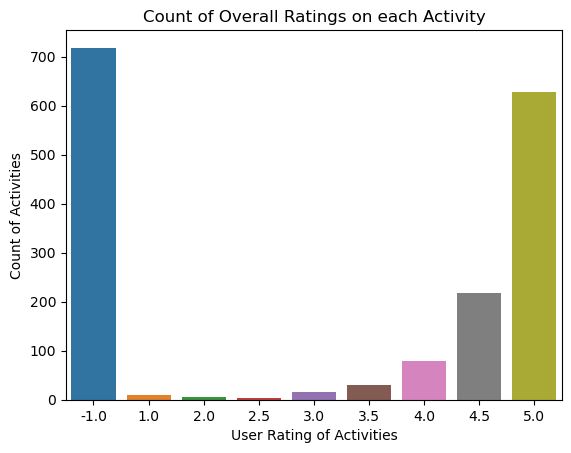

In [78]:
# From the plot it is observed that the ratings have a left skewed distribution
sns.countplot(data = final_att_data, x = 'rating')
plt.title('Count of Overall Ratings on each Activity')
plt.xlabel("User Rating of Activities")
plt.ylabel("Count of Activities");

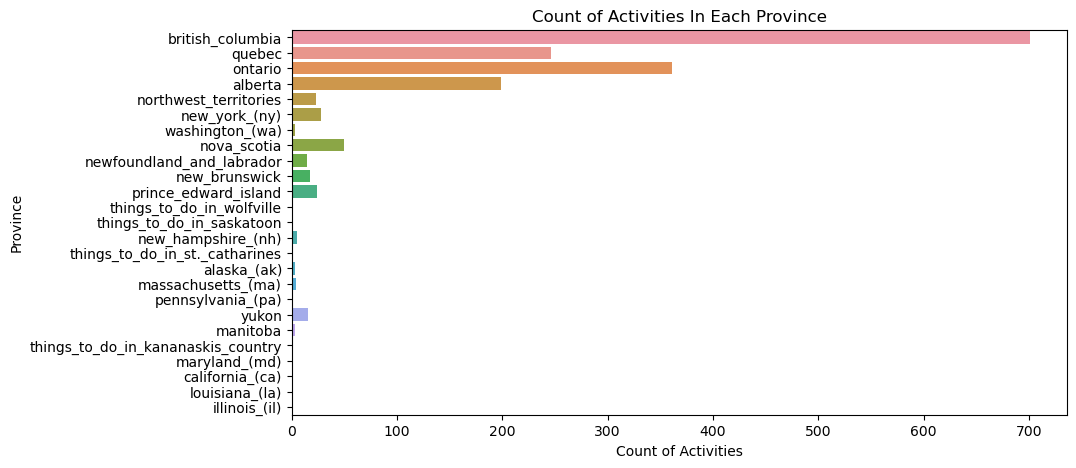

In [79]:
# From the activities are mainly centered around larger provinces (there are activites that originate from Canada to US, thus US Province/State is shown here)
plt.figure(figsize=(10,5))
sns.countplot(data = final_att_data, y = 'province', orient= 'h')
plt.title('Count of Activities In Each Province')
plt.ylabel("Province")
plt.xlabel("Count of Activities");

In [80]:
# The count of types of activities 
final_att_data[['accommodation', 'activities', 'adventure', 'air tour',
       'airland tour', 'airlandsea tour', 'airsea tour', 'alcohol', 'beach',
       'brewery', 'camping', 'city', 'classes & workshops', 'cruise',
       'distillery', 'entertainment', 'experience', 'food', 'hiking', 'island',
       'land tour', 'landsea tour', 'mountain views', 'nature', 'park',
       'photography', 'rental', 'sea tour', 'sightseeing', 'transport',
       'wildlife', 'winery']].sum()

accommodation            66
activities              931
adventure               311
air tour                 74
airland tour             13
airlandsea tour          17
airsea tour              15
alcohol                 290
beach                    28
brewery                  57
camping                  19
city                    481
classes & workshops      20
cruise                  191
distillery               21
entertainment            68
experience              433
food                    126
hiking                  110
island                   99
land tour              1016
landsea tour            125
mountain views          405
nature                  449
park                    330
photography              57
rental                   39
sea tour                292
sightseeing             954
transport               150
wildlife                163
winery                  174
dtype: int64

## Refinement of Categories

1. For `airland tour`= 13, `airlandsea tour`= 17, `airsea tour`= 15, `landsea tour`= 125, since their total count is low and is represented by their individual taggings (i.e. `land tour`, `sea tour`, `air tour`), thus they will be dropped from the category.
2. For `winery`= 175, `brewery`= 57, `distillery`= 21, these will be combined together to form a single category called `brewery/winery/distillery` since these activities have some similarity between them and their count is not that large.
3. `Activities` and `Alcohol` are generic category, thus these shall be removed.

In [81]:
# Combining the brewery, winery and distillery to 1 column.
final_att_data['brewery/winery/distillery'] = (final_att_data['brewery'] == 1) | (final_att_data['winery'] == 1) | (final_att_data['distillery'] == 1)

In [82]:
final_att_data['brewery/winery/distillery'] = final_att_data['brewery/winery/distillery'].map({False:0,True:1})

In [83]:
final_att_data.drop(columns=['airland tour', 'airlandsea tour', 'airsea tour','landsea tour', 'brewery', 'winery', 'distillery', 'activities','alcohol'], inplace=True)

In [84]:
# This is the final list of Categories that would be used in the tagging of each activity.
final_att_data[['accommodation','adventure', 'air tour', 'beach', 'camping', 'city',
       'classes & workshops', 'cruise', 'entertainment', 'experience', 'food',
       'hiking', 'island', 'land tour', 'mountain views', 'nature', 'park',
       'photography', 'rental', 'sea tour', 'sightseeing', 'transport',
       'wildlife', 'brewery/winery/distillery']].sum()

accommodation                  66
adventure                     311
air tour                       74
beach                          28
camping                        19
city                          481
classes & workshops            20
cruise                        191
entertainment                  68
experience                    433
food                          126
hiking                        110
island                         99
land tour                    1016
mountain views                405
nature                        449
park                          330
photography                    57
rental                         39
sea tour                      292
sightseeing                   954
transport                     150
wildlife                      163
brewery/winery/distillery     231
dtype: int64

In [85]:
categories = ['accommodation','adventure', 'air tour', 'beach', 'camping', 'city', 'classes & workshops', 
              'cruise', 'entertainment', 'experience', 'food', 'hiking', 'island', 'land tour', 
              'mountain views', 'nature', 'park', 'photography', 'rental', 'sea tour', 'sightseeing', 
              'transport', 'wildlife', 'brewery/winery/distillery']

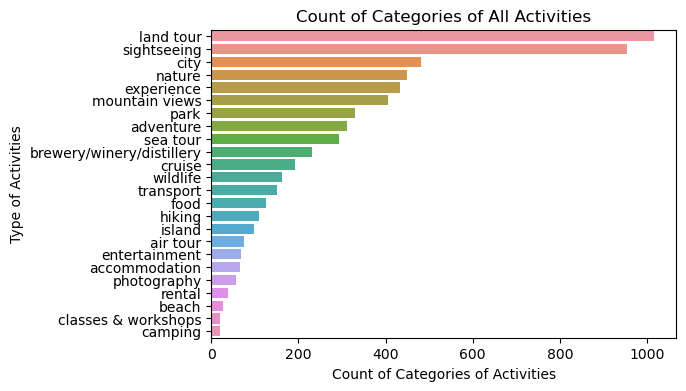

In [86]:
# Note that each activity can have more than 1 type of category.
plt.figure(figsize=(6,4))
sns.barplot(data=pd.DataFrame(final_att_data[categories].sum()).sort_values(by= 0,ascending=False).T, orient= 'h')
plt.title('Count of Categories of All Activities')
plt.xlabel("Count of Categories of Activities")
plt.ylabel("Type of Activities");

- Most of the activites are land tour and sightseeing
- There is almost equal distribution between city activities and nature activities

In [87]:
result = final_att_data.groupby(['city_name']).size().sort_values(ascending=False)

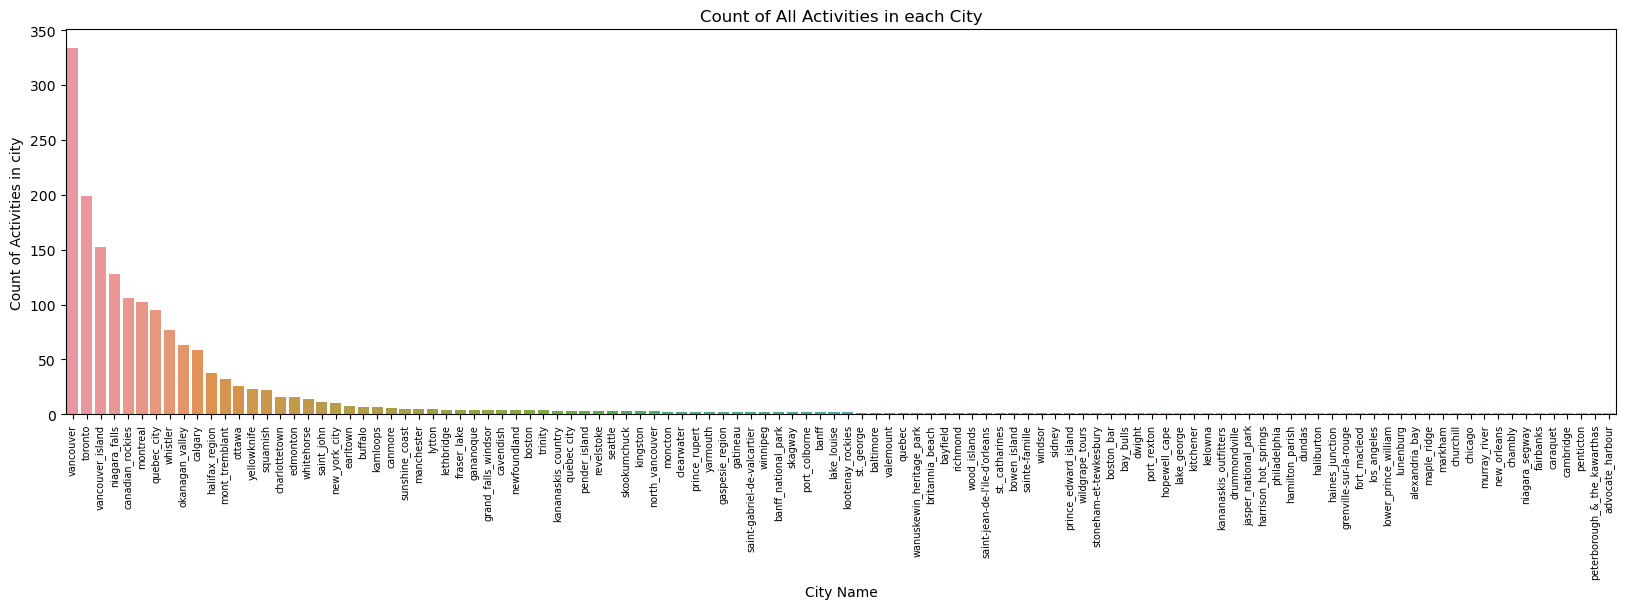

In [88]:
# Count of all activites in each city
plt.figure(figsize=(20,5))
sns.barplot(x = result.index, y = result.values)
plt.xticks(rotation = 90, fontsize=7)
plt.title('Count of All Activities in each City')
plt.xlabel("City Name")
plt.ylabel("Count of Activities in city");

- Most of the activites are concentrated within major cities

In [89]:
final_att_data.to_csv('./datasets/final_attractions_data.csv')

## Base Model - Cosine Similarity

In [90]:
# To prepare the dataframe for cosine similarity, the index is set to 'name' column
final_att_as_id = final_att_data.set_index(keys='name')

In [91]:
# Ignore price first
# Dummify the country, province, city, category, rating
# Drop location_lat, location_lng, attraction, price
final_att_as_id

,attraction_id,country,province,city_name,rating,group_reviews,attraction,description,duration,images,...,mountain views,nature,park,photography,rental,sea tour,sightseeing,transport,wildlife,brewery/winery/distillery
name,,,,,,,,,,,,,,,,,,,,,
vancouver_city_sightseeing_tour,0,canada,british_columbia,vancouver,4.5,Another 'Dave' Guides us Around Vancouver. Lan...,https://tripadvisor.ca/AttractionProductDetail...,A half-day sightseeing tour of Vancouver is th...,3h 30m,https://media-cdn.tripadvisor.com/media/attrac...,...,0,0,1,0,0,0,1,0,0,0
vancouver_to_victoria_and_butchart_gardens_tour_by_bus,1,canada,british_columbia,vancouver,5.0,Canada. I was there in 2004 and below it only ...,https://tripadvisor.ca/AttractionProductDetail...,"Relish stunning coastal mountain vistas, sheer...",13h,https://media-cdn.tripadvisor.com/media/attrac...,...,0,0,1,0,0,1,1,0,0,0
quebec_city_and_montmorency_falls_day_trip_from_montreal,2,canada,quebec,montreal,4.5,Interested City of Canada. Quebec is our belov...,https://tripadvisor.ca/AttractionProductDetail...,Discover Québec City history on a trip from Mo...,12h,https://media-cdn.tripadvisor.com/media/attrac...,...,0,0,0,0,0,0,1,0,0,0
niagara_falls_day_trip_from_toronto,3,canada,ontario,toronto,5.0,Great day. It was an amazing day. The falls ar...,https://tripadvisor.ca/AttractionProductDetail...,The spectacular Niagara Falls lie just south o...,9h 30m,https://media-cdn.tripadvisor.com/media/attrac...,...,0,0,0,0,0,1,1,0,0,1
"best_of_niagara_falls_tour_from_niagara_falls,_ontario",4,canada,ontario,niagara_falls,5.0,"Valentine's Trip. Chris was a wonderful guide,...",https://tripadvisor.ca/AttractionProductDetail...,The Canadian side of Niagara Falls offers some...,4â€“5 hours,https://media-cdn.tripadvisor.com/media/attrac...,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-minute_distillery_district_segway_tour_in_toronto,3546,canada,ontario,toronto,5.0,"So much fun!. OMG, so going on a Segway was on...",https://tripadvisor.ca/AttractionProductDetail...,Experience Toronto like never before on this e...,30m,https://media-cdn.tripadvisor.com/media/attrac...,...,0,0,0,0,0,0,1,0,0,0
montreal_quadricycle_rental,3557,canada,quebec,montreal,3.5,Family fun!. We rented a 6 person bicycle and ...,https://tripadvisor.ca/AttractionProductDetail...,Discover Montreal's Old Port with your friends...,Ticket type:,https://media-cdn.tripadvisor.com/media/attrac...,...,0,0,0,0,1,0,0,0,0,0
intro_survival_course_rockies,3561,canada,alberta,calgary,-1.0,NaN,https://tripadvisor.ca/AttractionProductDetail...,Adventurous travelers will enjoy learning new ...,2 days,https://media-cdn.tripadvisor.com/media/attrac...,...,1,0,0,0,0,0,1,0,0,0


In [92]:
# Dummify the columns province and city
final_att_as_id = pd.get_dummies(final_att_as_id, columns=['province','city_name'],drop_first=True)

In [93]:
final_att_as_id.columns

Index(['attraction_id', 'country', 'rating', 'group_reviews', 'attraction',
       'description', 'duration', 'images', 'accommodation', 'adventure',
       ...
       'city_name_vancouver_island', 'city_name_wanuskewin_heritage_park',
       'city_name_whistler', 'city_name_whitehorse',
       'city_name_wildgrape_tours', 'city_name_windsor', 'city_name_winnipeg',
       'city_name_wood_islands', 'city_name_yarmouth',
       'city_name_yellowknife'],
      dtype='object', length=167)

In [94]:
# Drop these columns that is not used for cosine similarity
final_att_as_id.drop(labels=['attraction_id', 'attraction','group_reviews','country','rating','description','duration','images'],axis=1, inplace= True)

In [95]:
final_att_as_id

,accommodation,adventure,air tour,beach,camping,city,classes & workshops,cruise,entertainment,experience,...,city_name_vancouver_island,city_name_wanuskewin_heritage_park,city_name_whistler,city_name_whitehorse,city_name_wildgrape_tours,city_name_windsor,city_name_winnipeg,city_name_wood_islands,city_name_yarmouth,city_name_yellowknife
name,,,,,,,,,,,,,,,,,,,,,
vancouver_city_sightseeing_tour,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vancouver_to_victoria_and_butchart_gardens_tour_by_bus,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
quebec_city_and_montmorency_falls_day_trip_from_montreal,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
niagara_falls_day_trip_from_toronto,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"best_of_niagara_falls_tour_from_niagara_falls,_ontario",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-minute_distillery_district_segway_tour_in_toronto,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
montreal_quadricycle_rental,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
intro_survival_course_rockies,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Attractions consine similarity
att_sim = pd.DataFrame(cosine_similarity(final_att_as_id), columns=final_att_as_id.index, index=final_att_as_id.index)

In [97]:
att_sim.head(10)

name,vancouver_city_sightseeing_tour,vancouver_to_victoria_and_butchart_gardens_tour_by_bus,quebec_city_and_montmorency_falls_day_trip_from_montreal,niagara_falls_day_trip_from_toronto,"best_of_niagara_falls_tour_from_niagara_falls,_ontario",niagara_falls_in_one_day:_deluxe_sightseeing_tour_of_american_and_canadian_sides,whistler_small-group_day_trip_from_vancouver,ultimate_niagara_falls_tour_plus_helicopter_ride_and_skylon_tower_lunch,"local_food,_craft_beverage_and_estate_winery_tour_of_cowichan_valley",private_tour:_vancouver_to_victoria_island,...,quebec_city_shore_excursion:_quebec_city_sightseeing_tour,montreal_indoor_skydiving_introductory_package,banff_day_trip_from_calgary,60-minute_deluxe_horse-drawn_carriage_tour,toronto_inner_harbour_evening_cruise,30-minute_distillery_district_segway_tour_in_toronto,montreal_quadricycle_rental,intro_survival_course_rockies,private_toronto_guided_city_tour,peyto_lake_snowshoe_tour
name,,,,,,,,,,,,,,,,,,,,,
vancouver_city_sightseeing_tour,1.000000,0.721688,0.547723,0.288675,0.333333,0.333333,0.617213,0.308607,0.365148,0.771517,...,0.547723,0.182574,0.308607,0.771517,0.308607,0.547723,0.204124,0.272166,0.547723,0.387298
vancouver_to_victoria_and_butchart_gardens_tour_by_bus,0.721688,1.000000,0.316228,0.500000,0.577350,0.577350,0.534522,0.534522,0.316228,0.935414,...,0.316228,0.000000,0.267261,0.534522,0.400892,0.316228,0.000000,0.235702,0.316228,0.335410
quebec_city_and_montmorency_falls_day_trip_from_montreal,0.547723,0.316228,1.000000,0.316228,0.365148,0.365148,0.338062,0.338062,0.200000,0.338062,...,0.800000,0.600000,0.338062,0.507093,0.338062,0.600000,0.670820,0.298142,0.600000,0.282843
niagara_falls_day_trip_from_toronto,0.288675,0.500000,0.316228,1.000000,0.721688,0.721688,0.267261,0.668153,0.474342,0.400892,...,0.316228,0.000000,0.267261,0.267261,0.668153,0.632456,0.000000,0.235702,0.632456,0.223607
"best_of_niagara_falls_tour_from_niagara_falls,_ontario",0.333333,0.577350,0.365148,0.721688,1.000000,1.000000,0.308607,0.925820,0.182574,0.462910,...,0.365148,0.000000,0.308607,0.308607,0.617213,0.547723,0.000000,0.272166,0.547723,0.258199
niagara_falls_in_one_day:_deluxe_sightseeing_tour_of_american_and_canadian_sides,0.333333,0.577350,0.365148,0.721688,1.000000,1.000000,0.308607,0.925820,0.182574,0.462910,...,0.365148,0.000000,0.308607,0.308607,0.617213,0.547723,0.000000,0.272166,0.547723,0.258199
whistler_small-group_day_trip_from_vancouver,0.617213,0.534522,0.338062,0.267261,0.308607,0.308607,1.000000,0.285714,0.338062,0.571429,...,0.338062,0.000000,0.571429,0.428571,0.285714,0.338062,0.000000,0.377964,0.338062,0.478091
ultimate_niagara_falls_tour_plus_helicopter_ride_and_skylon_tower_lunch,0.308607,0.534522,0.338062,0.668153,0.925820,0.925820,0.285714,1.000000,0.169031,0.428571,...,0.338062,0.000000,0.285714,0.285714,0.571429,0.507093,0.000000,0.251976,0.507093,0.239046
"local_food,_craft_beverage_and_estate_winery_tour_of_cowichan_valley",0.365148,0.316228,0.200000,0.474342,0.182574,0.182574,0.338062,0.169031,1.000000,0.338062,...,0.200000,0.000000,0.169031,0.507093,0.000000,0.200000,0.000000,0.149071,0.200000,0.141421


In [98]:
att_sim['banff_day_trip_from_calgary'].drop('banff_day_trip_from_calgary').sort_values(ascending=False).head(10)

name
fatbike_frozen_waterfall_tour                                                 0.935414
banff_national_park_tour_with_a_small_group                                   0.935414
triple_c_adventure                                                            0.925820
summer_tour_to_lake_louise,_moraine_lake_&_yoho_national_park_from_calgary    0.925820
calgary_and_banff_mountain_biking_adventure                                   0.881917
banff_national_park_summer_tour_from_calgary                                  0.857143
calgary,_banff_(in-depth),_jasper_&_yoho_national_parks_tour_from_calgary     0.857143
high_spirits_adventure                                                        0.857143
jasper_city_sightseeing_tour                                                  0.857143
banff_national_park,_cave_&_basin_national_historic_site_tour_from_calgary    0.857143
Name: banff_day_trip_from_calgary, dtype: float64

## Survey Response
- Based on a survey response of 16 people, approximately 11 got a good recommendation. 
- Thus, this concludes that the base model has a good performance in recommending activities based on user preferences on the different types of categories that is being chosen.

![image](./assets/survey_qns.jpg)

# Cold-start (New User)
- The issue with recommender system is the new user/ coldstart issue is that since it does not have record of user preference, it is unable to recommend to what user likes.
- In order to tackle this issue, during the user's interaction with the recommender system, it would request the user to indicate their preference before recommending the activities.

In [99]:
# Check the number of columns of the final_att_as_id dataframe
final_att_as_id.columns

Index(['accommodation', 'adventure', 'air tour', 'beach', 'camping', 'city',
       'classes & workshops', 'cruise', 'entertainment', 'experience',
       ...
       'city_name_vancouver_island', 'city_name_wanuskewin_heritage_park',
       'city_name_whistler', 'city_name_whitehorse',
       'city_name_wildgrape_tours', 'city_name_windsor', 'city_name_winnipeg',
       'city_name_wood_islands', 'city_name_yarmouth',
       'city_name_yellowknife'],
      dtype='object', length=159)

In [100]:
# Creating an empty user profile
attract_categories = final_att_as_id.columns # match feature space for new user<>our existing dataset
my_profile = pd.Series(data=np.zeros(len(attract_categories)), index=final_att_as_id.columns) # initialize 0s for all genres to create new user vector using: (https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)
my_profile

accommodation             0.0
adventure                 0.0
air tour                  0.0
beach                     0.0
camping                   0.0
                         ... 
city_name_windsor         0.0
city_name_winnipeg        0.0
city_name_wood_islands    0.0
city_name_yarmouth        0.0
city_name_yellowknife     0.0
Length: 159, dtype: float64

In [101]:
my_profile['adventure'] = 3
my_profile['hiking'] = 4
my_profile['mountain views'] = 5
my_profile['nature'] = 4
my_profile['sightseeing'] = 5

In [102]:
print(my_profile['adventure'],my_profile['hiking'],my_profile['mountain views'],my_profile['nature'],my_profile['sightseeing'])

3.0 4.0 5.0 4.0 5.0


In [103]:
my_profile.values

array([0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 5., 4., 0.,
       0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [104]:
final_att_as_id.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [105]:
np.dot(final_att_as_id.values, my_profile.values)

array([ 5.,  5.,  5., ..., 17.,  5., 21.])

In [106]:
# Finally, Find the dot product between the attractions vectors and my_profile (new user) vector that are both on the same feature space
recommendations = np.dot(final_att_as_id.values, my_profile.values)

# Convert to pandas Series for ease of working with the recommendations data
recommendations = pd.Series(recommendations, index=final_att_as_id.index)

# Getting top 20 recommendations for a new-user! 
recommendations.sort_values(ascending=False).head(20)

name
peyto_lake_snowshoe_tour                                                         21.0
skiing_for_beginner,_snow_tubing_or_snowshoeing_tour_from_toronto                21.0
canadian_rockies_hiking_tour_-_close_to_canmore_&_banff_-_great_for_families!    21.0
squamish_via_ferrata_tour                                                        21.0
whistler_via_ferrata_tour                                                        21.0
whistler_backcountry_skiing_and_splitboarding                                    21.0
guided_sunset_hiking_tour_(transportation,_guide_&_snacks_included)              21.0
day_hike_in_the_rocky_mountains                                                  21.0
snowshoe_in_kananaskis_country                                                   21.0
sun_peaks_3-day_ski_and_ride_trip                                                21.0
nordic_backcountry_skiing_tour_in_jacques-cartier_national_park                  21.0
yukon_ice_fishing_and_snowshoeing_tour           

# Streamlit - For Base Model

- Preparing the files to be used on Streamlit

In [107]:
attractions = final_att_data.copy()

In [108]:
attractions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1783
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   attraction_id              1705 non-null   int64  
 1   name                       1705 non-null   object 
 2   country                    1705 non-null   object 
 3   province                   1705 non-null   object 
 4   city_name                  1705 non-null   object 
 5   rating                     1705 non-null   float64
 6   group_reviews              797 non-null    object 
 7   attraction                 1705 non-null   object 
 8   description                1705 non-null   object 
 9   duration                   1704 non-null   object 
 10  images                     1705 non-null   object 
 11  accommodation              1705 non-null   int64  
 12  adventure                  1705 non-null   int64  
 13  air tour                   1705 non-null   int64

In [109]:
attractions.to_csv('./datasets/attractions_canada.csv')

In [110]:
import pickle
pickle.dump(attractions.to_dict(),open('./datasets/attractions.pkl','wb'))

- The original categories that is assigned to the activities did not correctly capture the type of activity, thus it could not be used for analysis.
- The final categories that were used in the dataset `final_att_data` are as per the table below.

|Category|Description|
|----|----|
|Accommodation|Activites that include accommodation|
|Adventure|Ziplining, Rafting, Snowshoeing and more|
|Air Tour|Tour in the Air with Guide|
|Beach|Visiting a Beach|
|Brewery/ Distillery/Winery|Visiting Brewery/Distillery/Winery|
|Camping|Activites that involves camping|
|Classes & Workshops|Activities that involves an instructor|
|Entertainment|Live entertainment (excluding live commentary)/watching or hearing somethng|
|Equipment Rental|Only renting of equipment (snowboard, bicycle, boat, etc), no tours|
|Food|Food Tours|
|Hiking|Involves Hiking|
|Includes Transport|Transport from A to B, includes passes and hop-on/off tours|
|Island Hopping|Visiting an island|
|Land Tour|Tour in the Land with Guide|
|Located In City|Activities that takes place in the City|
|Located in Nature|Activities that takes place in Nature/Mountain|
|Mountain Views|Having Mountain Views|
|Park|Visiting Parks and Gardens|
|Photoshoot|Photography service is provided/included
|River Cruise| E.g. River cruise, ferry to another island|
|Sea Tour|Tour in the Sea with Guide|
|Sightseeing|Visting places of Interest|
|Unique Experience|Experience an activity/do something "extra-ordinary"|
|Wildlife Spotting|Sealife spotting, Bird Watching, etc..|

- The Base Model recommendation of activities were based on similarity value based on computing the user's profile and the activities categories.
- However, just based on activities categories alone on a recommender is not sufficient as user ratings and reviews were not looked into.
- Thus, Notebook 3 will look into the user review (through using pre-trained NLP model) and evaluate based on sentiment analysis.